# Import Libraries

In [64]:
# Basic Libraries 
# --------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams

# import matplotlib
#  matplotlib.use("Qt5Agg")
import missingno as msno
from datetime import date

# Plotly Express - Plotly - cufflinks 
# --------------------------------------

import cufflinks as cf
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# Metrics 
# --------------------------------------
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
    classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import LocalOutlierFactor

# Machine Learning Models For Regression 
# --------------------------------------
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.cross_decomposition import PLSRegression



# Machine Learning Models For Classification 
# --------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB, ComplementNB
from sklearn.cross_decomposition import PLSCanonical


# Remove Warnings
# ------------------------------------------------------------
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)
from termcolor import colored

constraints = ['#581845', '#C70039']
metric_constraints = ['#2ECC71', '#34495E', '#D0D3D4']
cat_feat_constraints = ['#7FB3D5', '#76D7C4', '#F7DC6F', '#85929E', '#283747']


# Load And Check Data

In [2]:
df = pd.read_csv("datasets/diabetes.csv")

In [3]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(df, head=5):
    print("Info".center(100, '~'))
    print(df.info())
    print(" Dataframe - Head ".center(100, '~'))
    print(df.head(head))
    print("Unique Values".center(100, '~'))
    print(df.nunique())
    print(" Missing Values Analysis ".center(100, '~'))
    print(missing_values_analysis(df))
    print(' Duplicate Values Analysis '.center(100, '~'))
    print(df.duplicated().sum())
    print(" QUANTILES ".center(100, '~'))
    print(df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Info~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Dataframe - Head ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Pregnancies  Glucose  BloodPre

In [4]:
def grab_col_names(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() > car_th]

    cat_cols += num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float", "int32", "float32", "int64",
                                                                "float64"]]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {df.shape[0]} \t Variables: {df.shape[1]}")
    print("~" * 100)
    print(f'cat_cols size: {len(cat_cols)}')
    print("cat_cols:", cat_cols)
    print("~" * 100)
    print(f'num_cols size: {len(num_cols)}')
    print("num_cols:", num_cols)
    print("~" * 100)
    print(f'cat_but_car size: {len(cat_but_car)}')
    print("cat_but_car:", cat_but_car)
    print("~" * 100)
    print(f'num_but_cat size: {len(num_but_cat)}')
    print("num_but_cat:", num_but_cat)
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 768 	 Variables: 9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_cols size: 1
cat_cols: ['Outcome']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_cols size: 8
num_cols: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_but_car size: 0
cat_but_car: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_but_cat size: 1
num_but_cat: ['Outcome']


# Exploratory Data Analysis

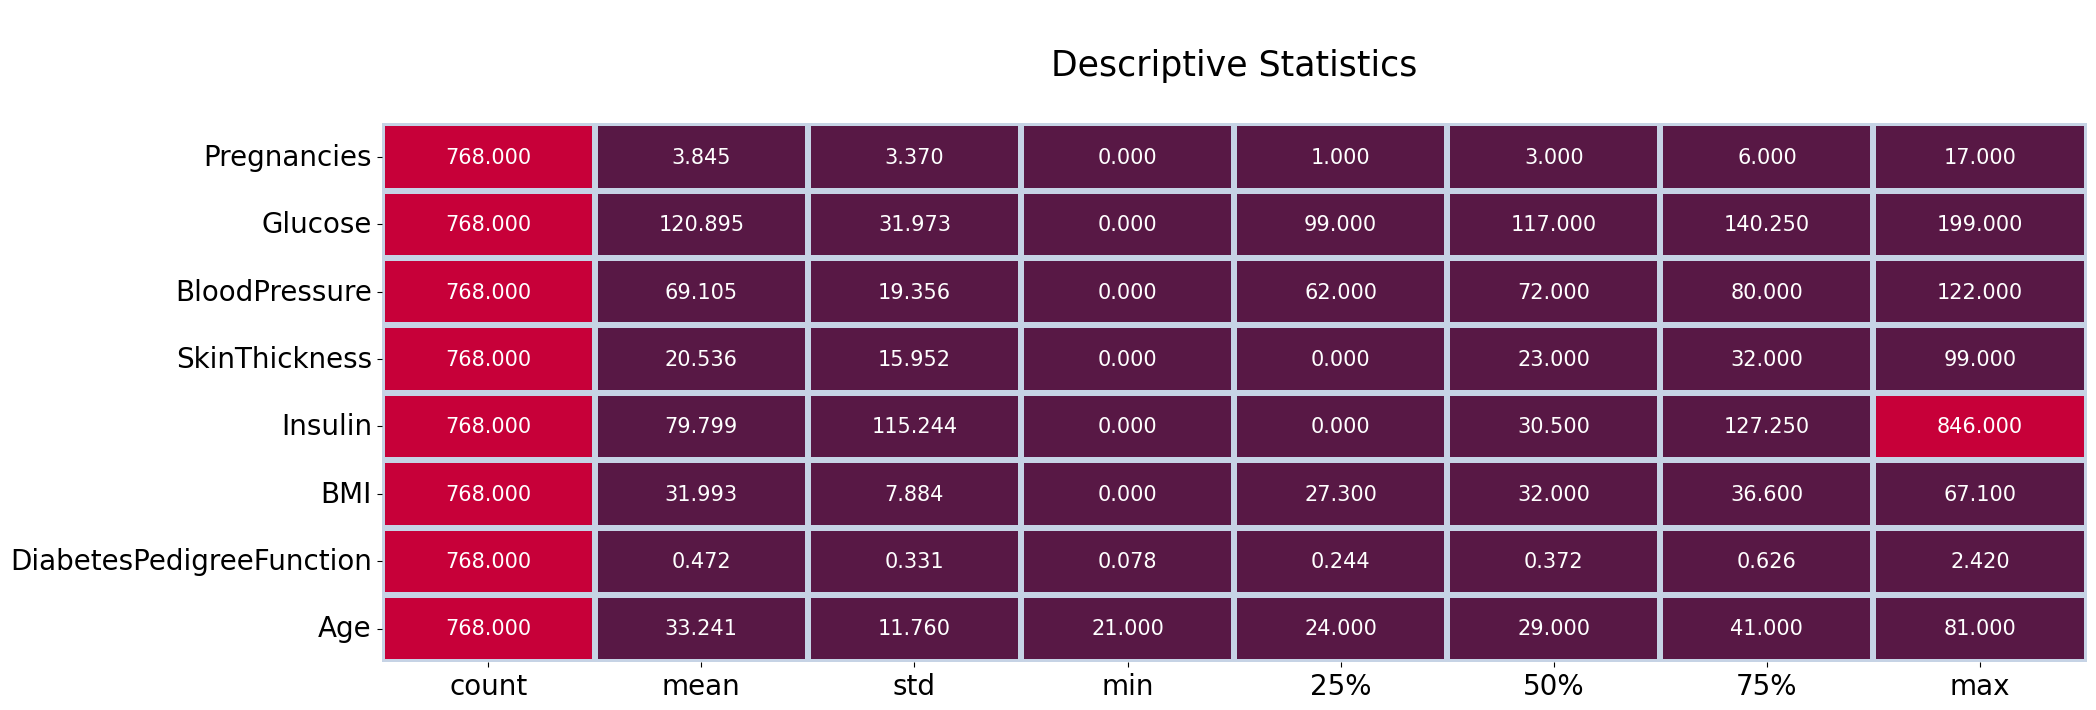

In [5]:
def descriptive_statistics(df):
    describe_ = df.describe().T
    describe_df = pd.DataFrame(index=df.columns,
                               columns=describe_.columns,
                               data=describe_)

    f, ax = plt.subplots(figsize=(22, 7))
    sns.heatmap(describe_df,
                annot=True,
                cmap=constraints,
                fmt='.3f',
                ax=ax,
                linecolor='#C6D3E5',
                linewidths=3,
                cbar=False,
                annot_kws={"size": 15})
    plt.xticks(size=20)
    plt.yticks(size=20,
               rotation=0)
    plt.title("\nDescriptive Statistics\n", size=25)
    plt.show()


num_desc = df[num_cols]
descriptive_statistics(num_desc)


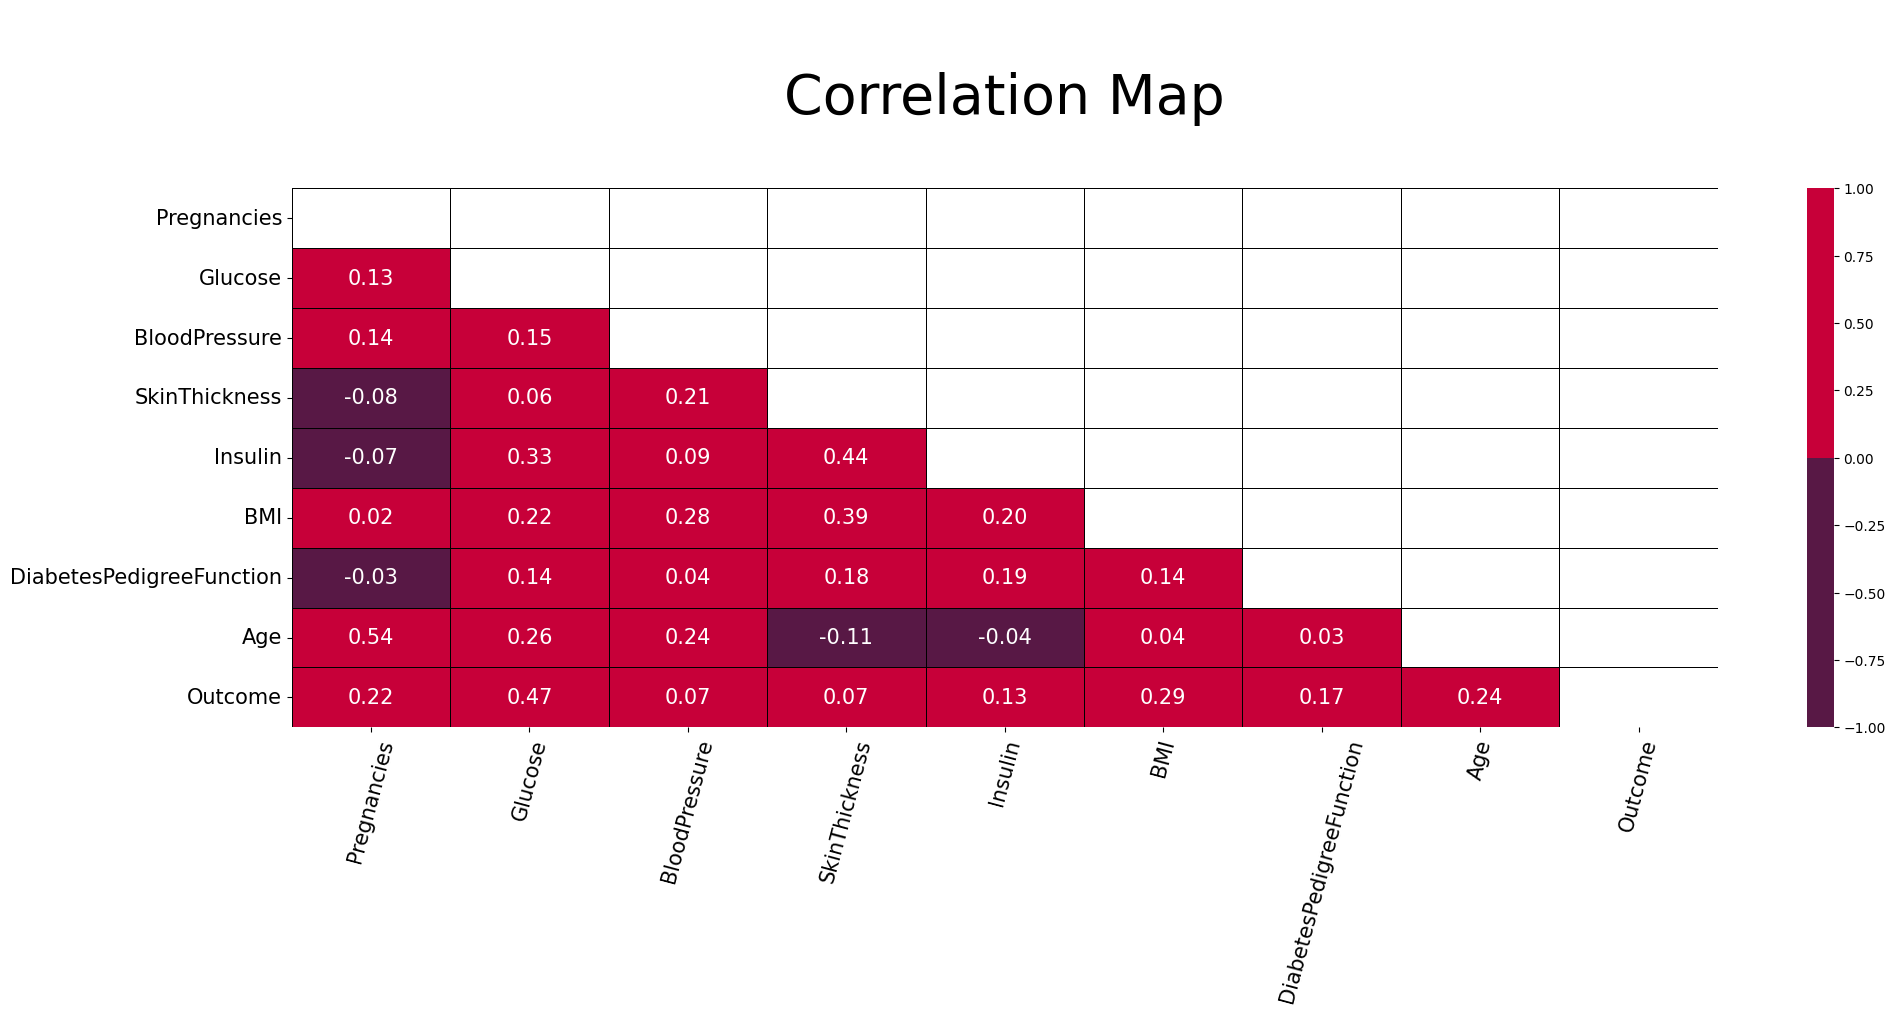

In [6]:
def corr_map(df, width=23, height=7):
    mtx = np.triu(df.corr())
    f, ax = plt.subplots(figsize=(width, height))
    sns.heatmap(df.corr(),
                annot=True,
                fmt=".2f",
                ax=ax,
                vmin=-1,
                vmax=1,
                cmap=constraints,
                mask=mtx,
                linewidth=0.4,
                linecolor="black",
                annot_kws={"size": 15})
    plt.yticks(rotation=0, size=15)
    plt.xticks(rotation=75, size=15)
    plt.title('\nCorrelation Map\n', size=40)
    plt.show()


corr_map(df)

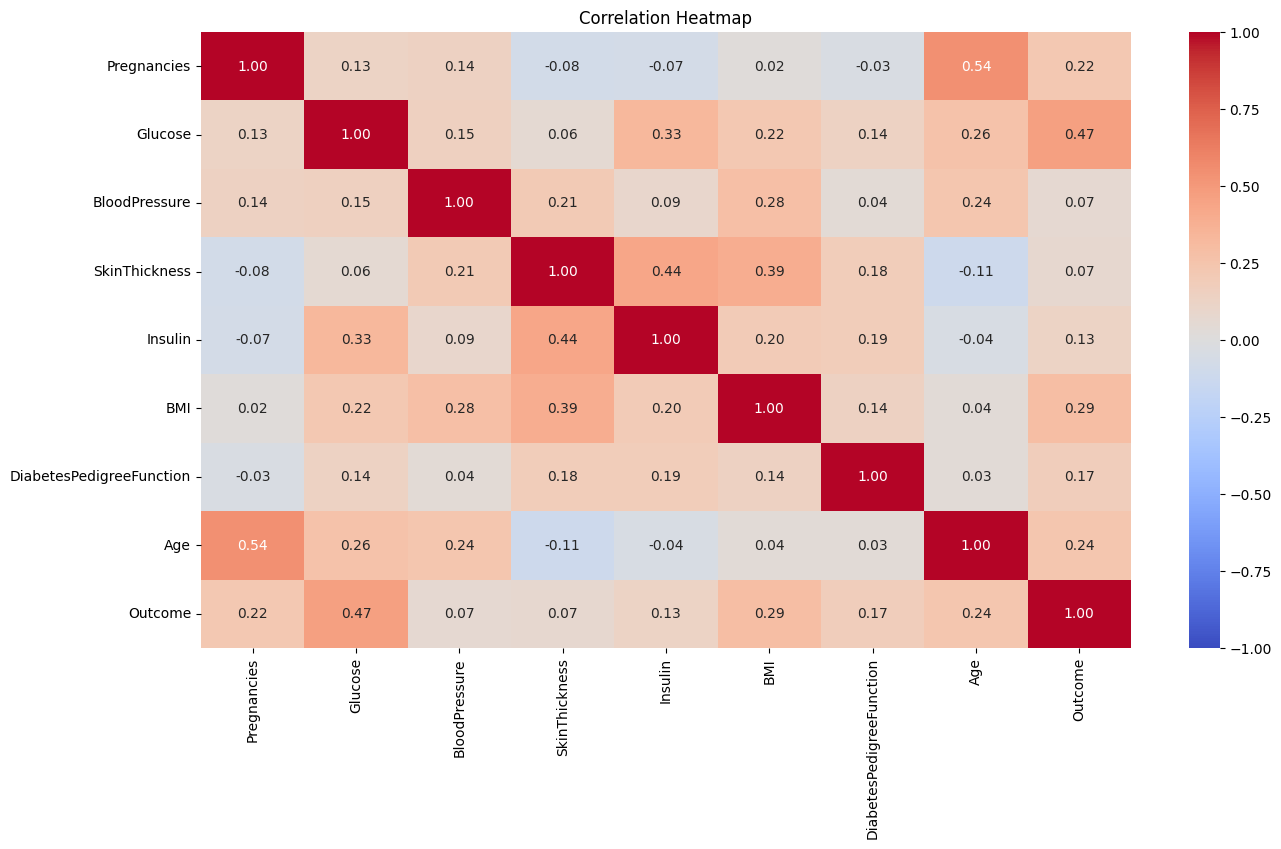

In [7]:
def plot_correlation_heatmap(dataframe):
    correlation_matrix = dataframe.corr()

    plt.figure(figsize=(15, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    plt.show()


plot_correlation_heatmap(df)


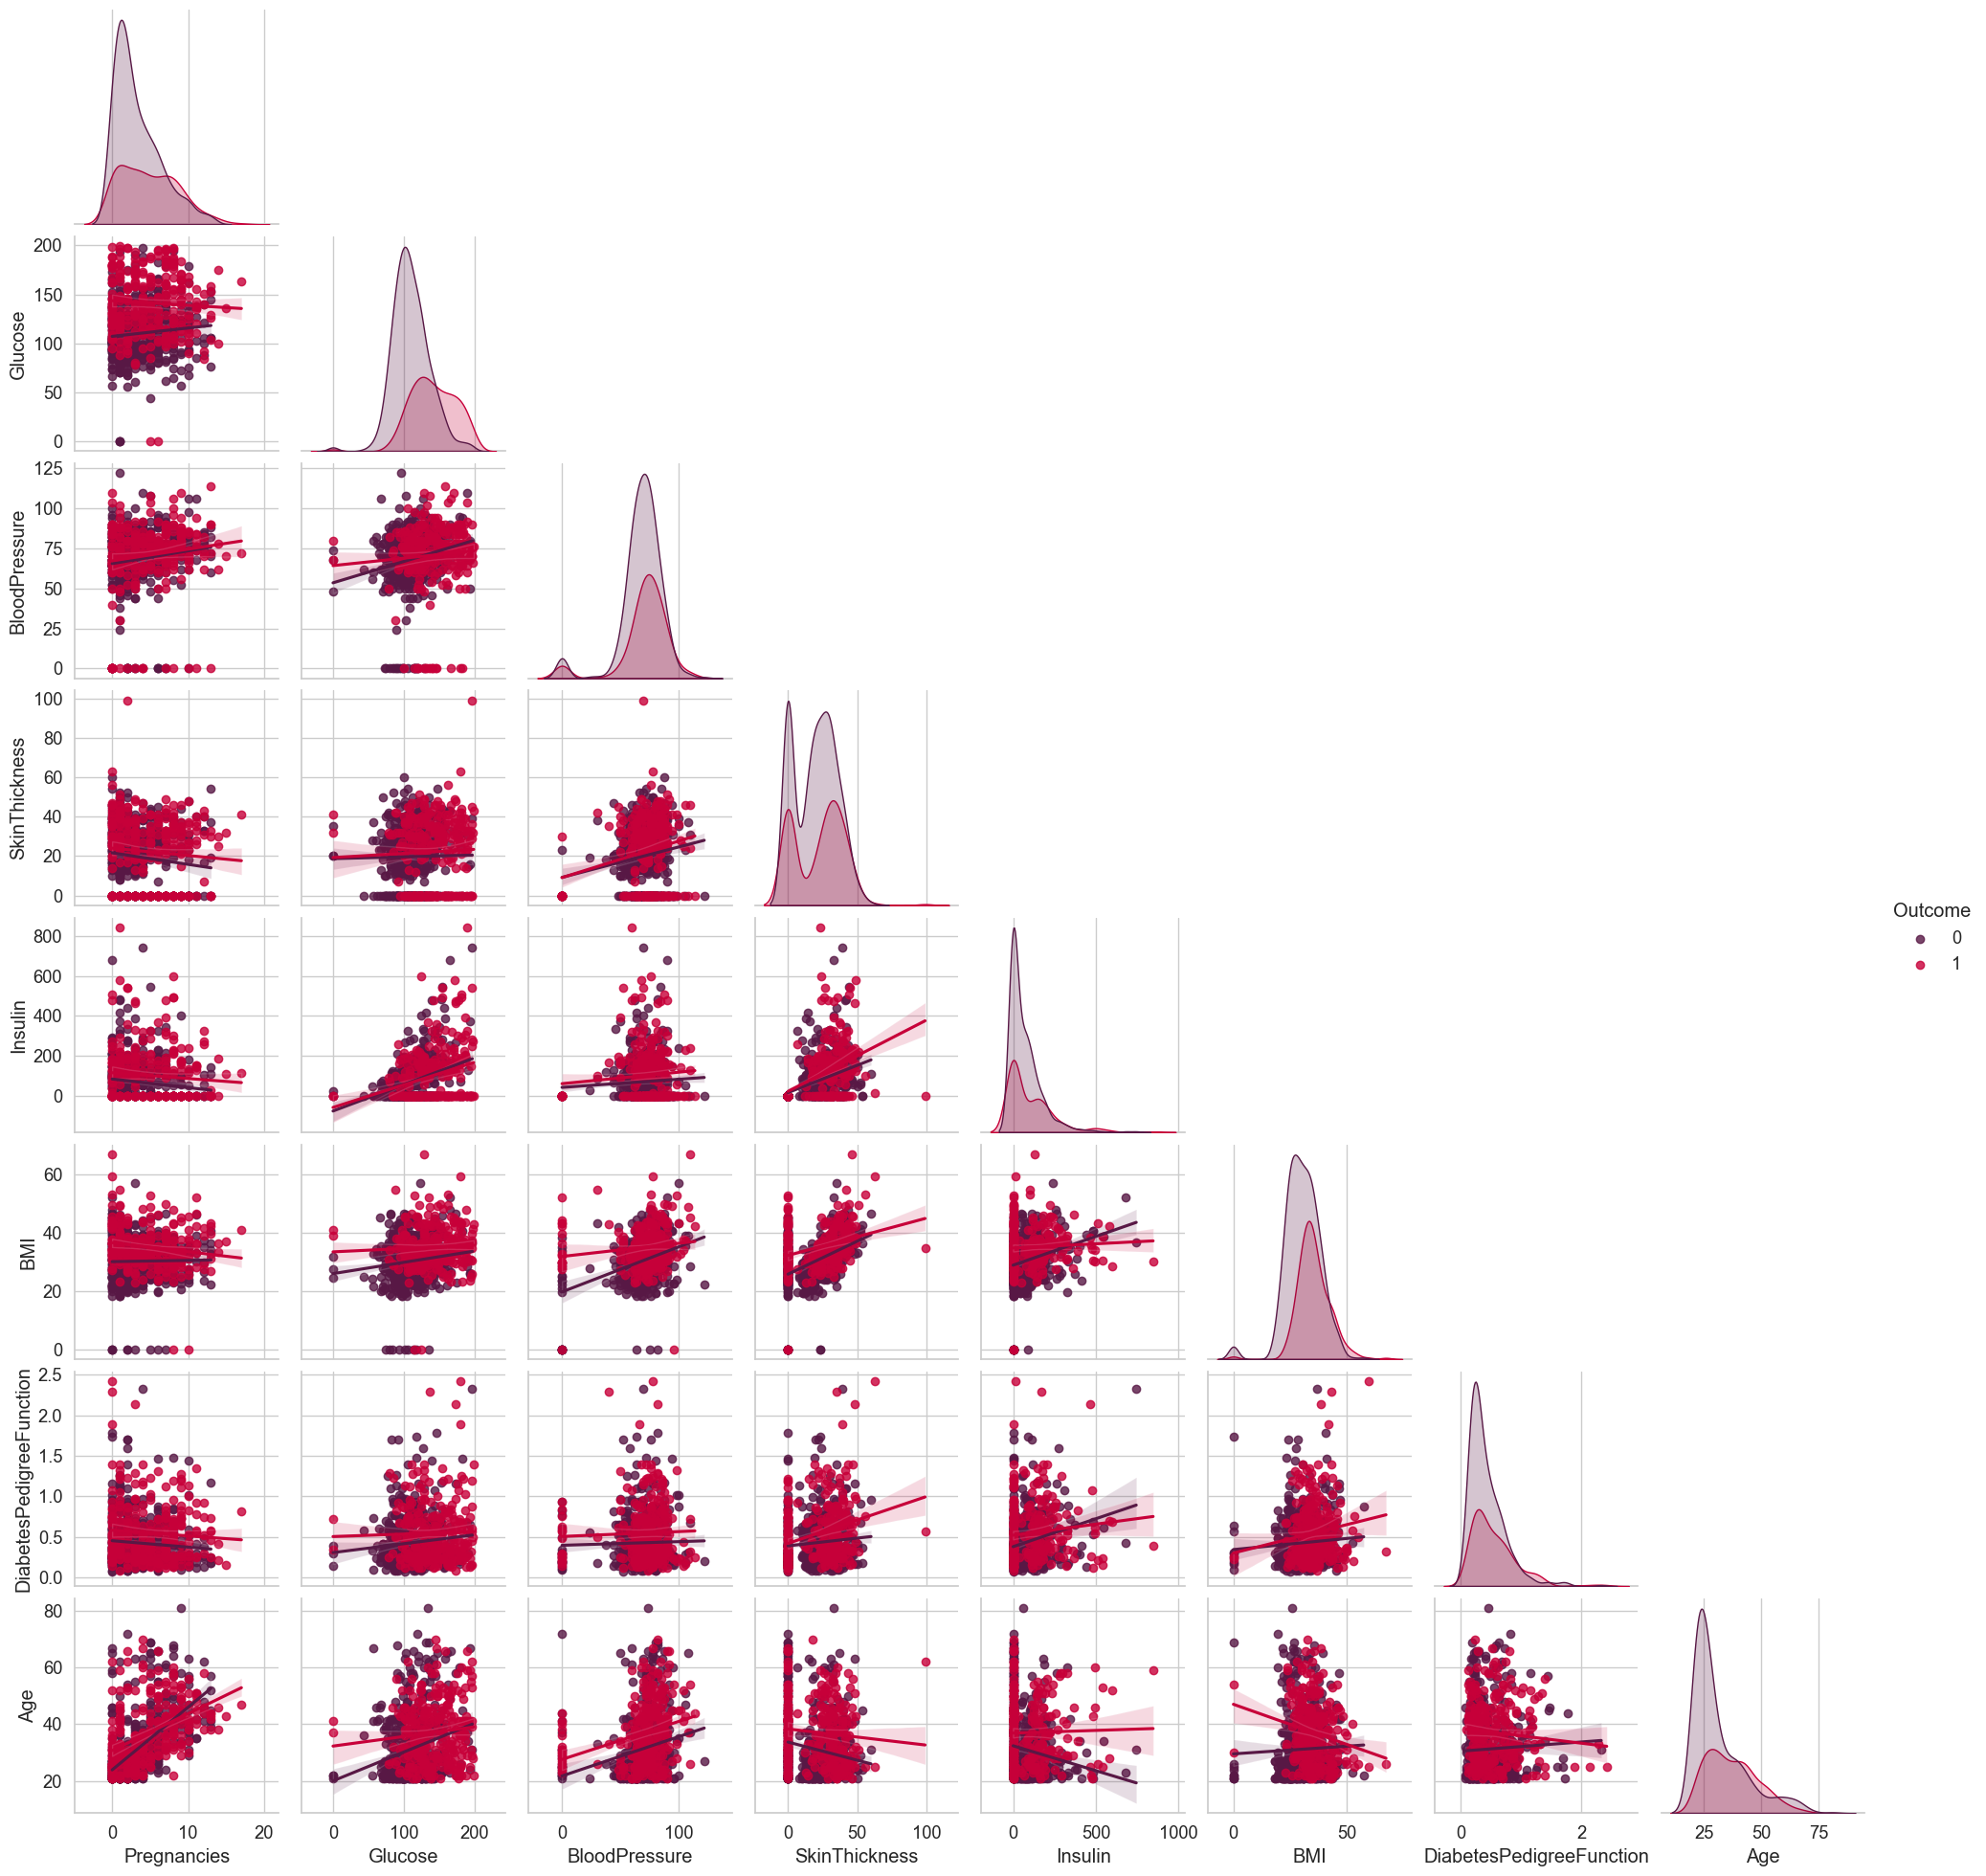

In [8]:
sns.set(font_scale=1.2,
        style="whitegrid",
        palette=constraints,
        font="sans-serif")
sns.pairplot(df,
             hue='Outcome',
             corner=True,
             kind='reg');

# Analysis of Numerical Features

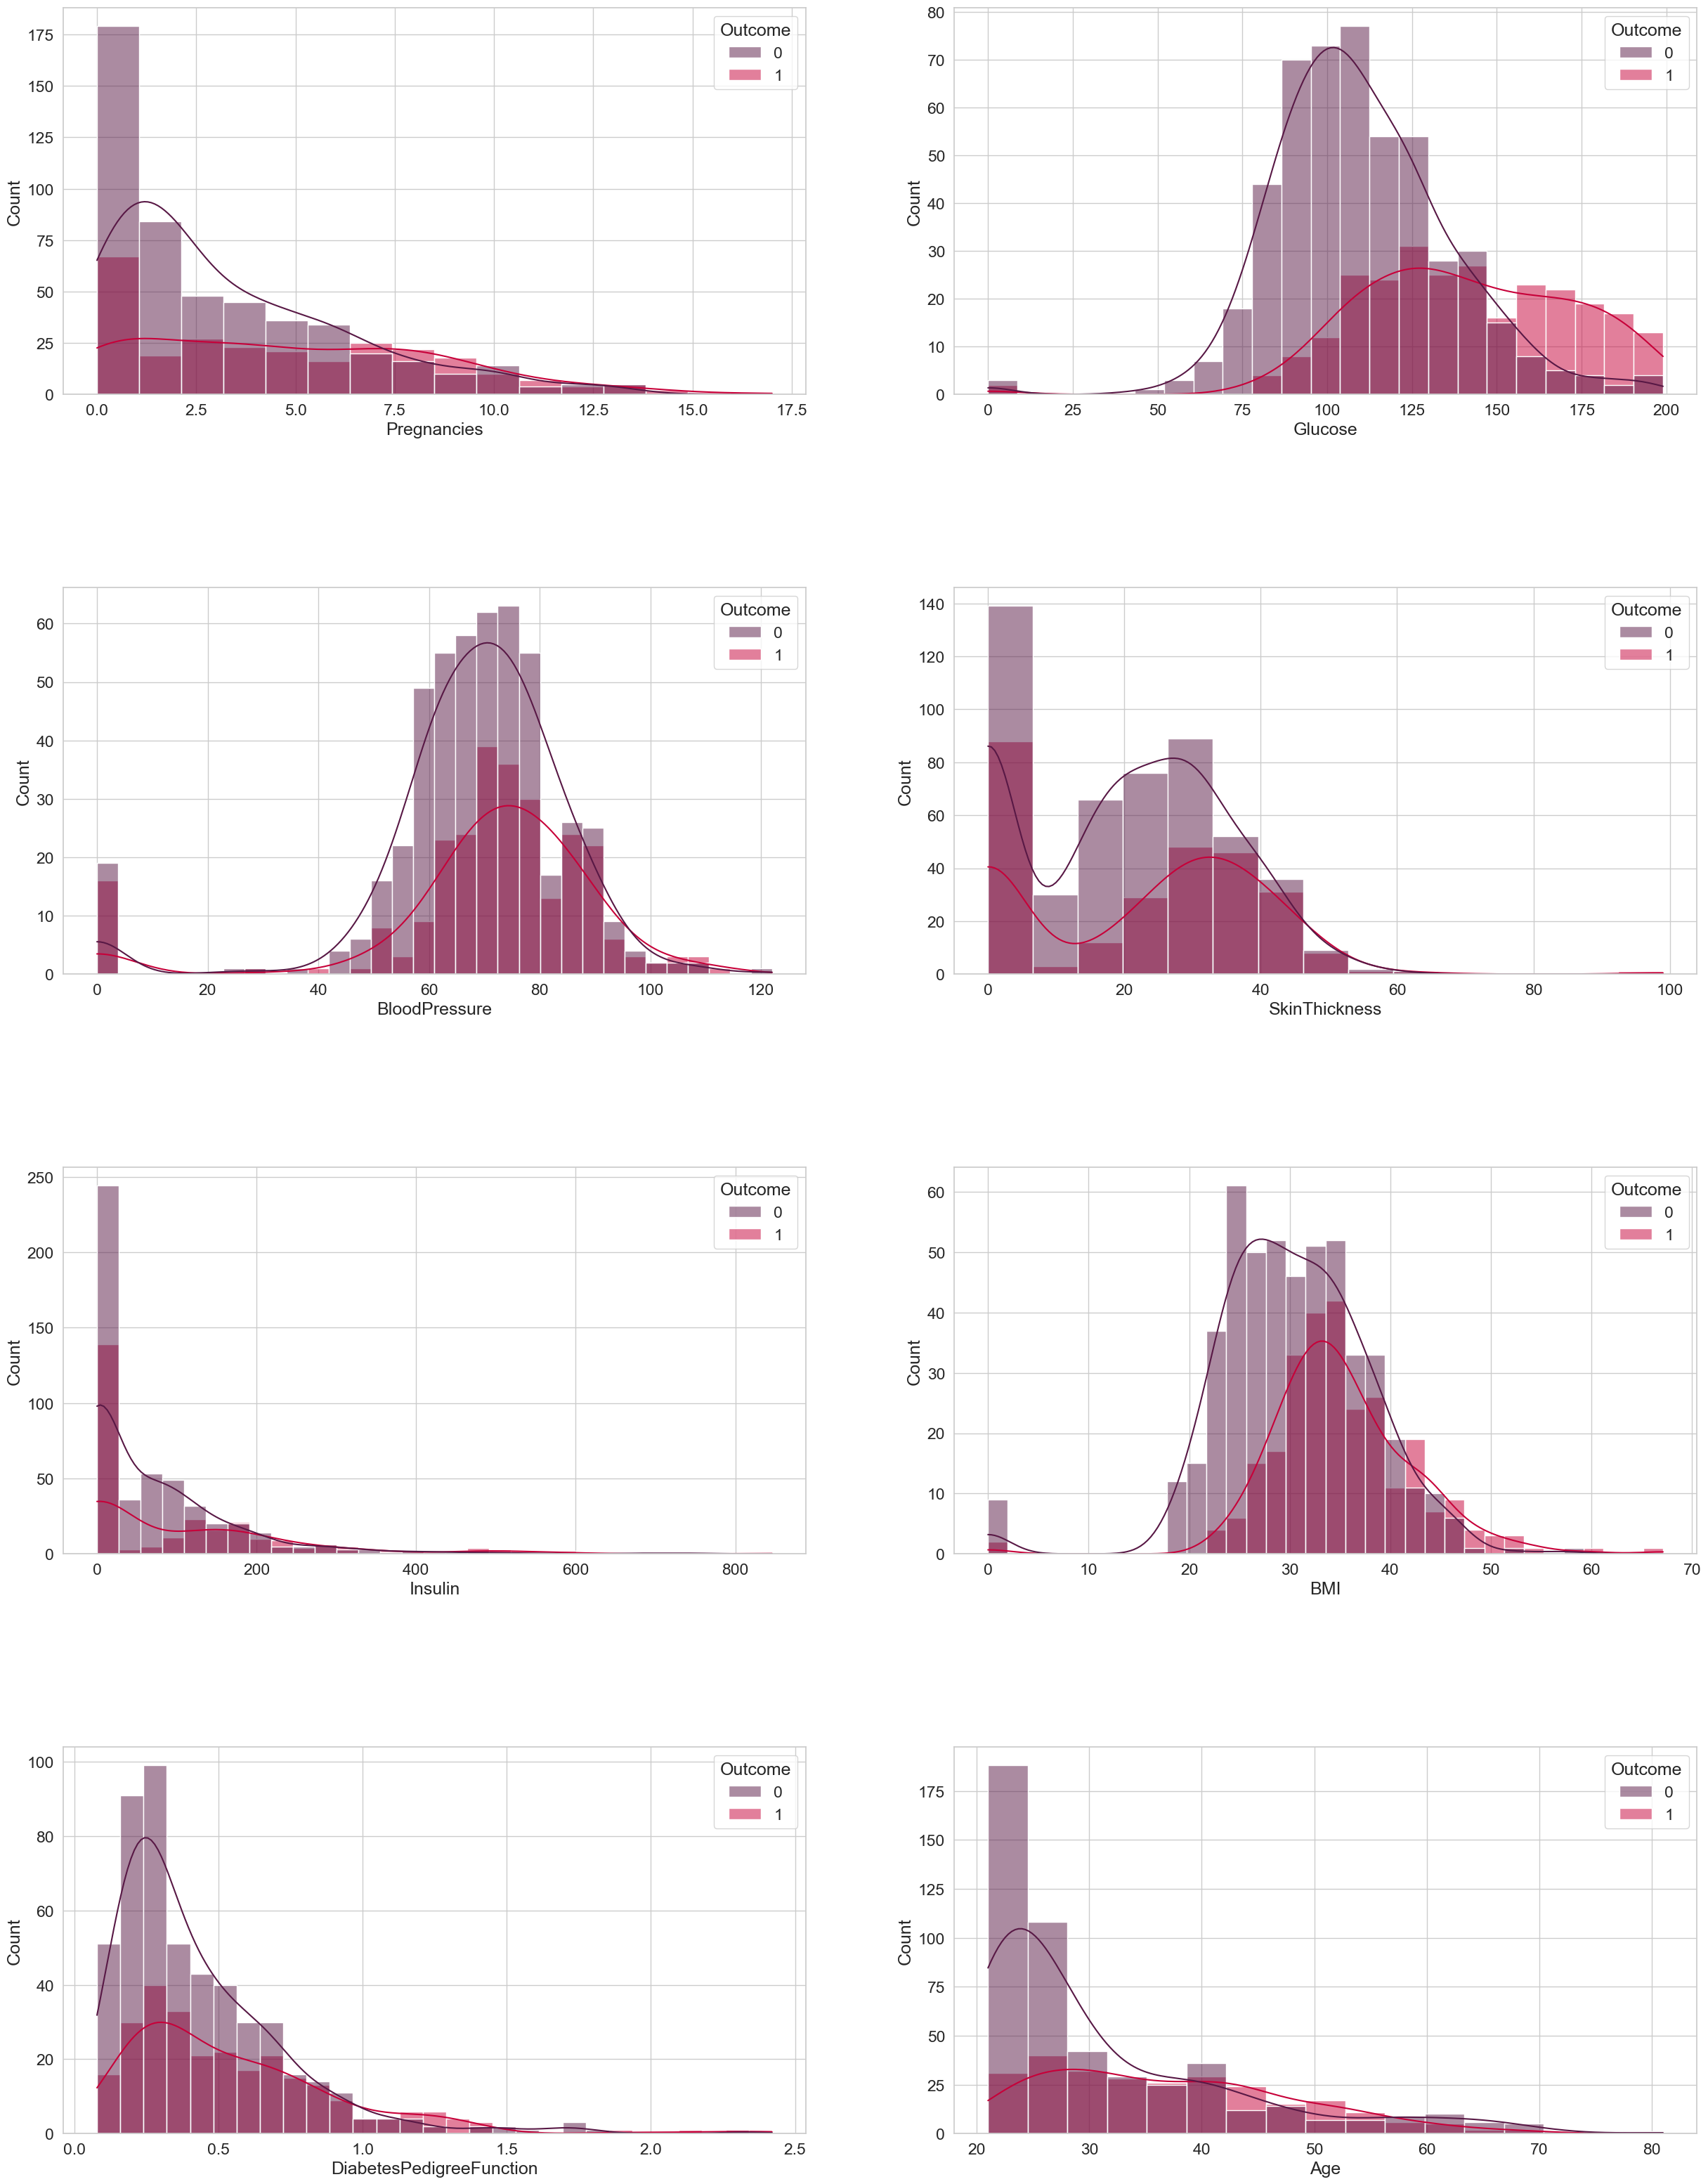

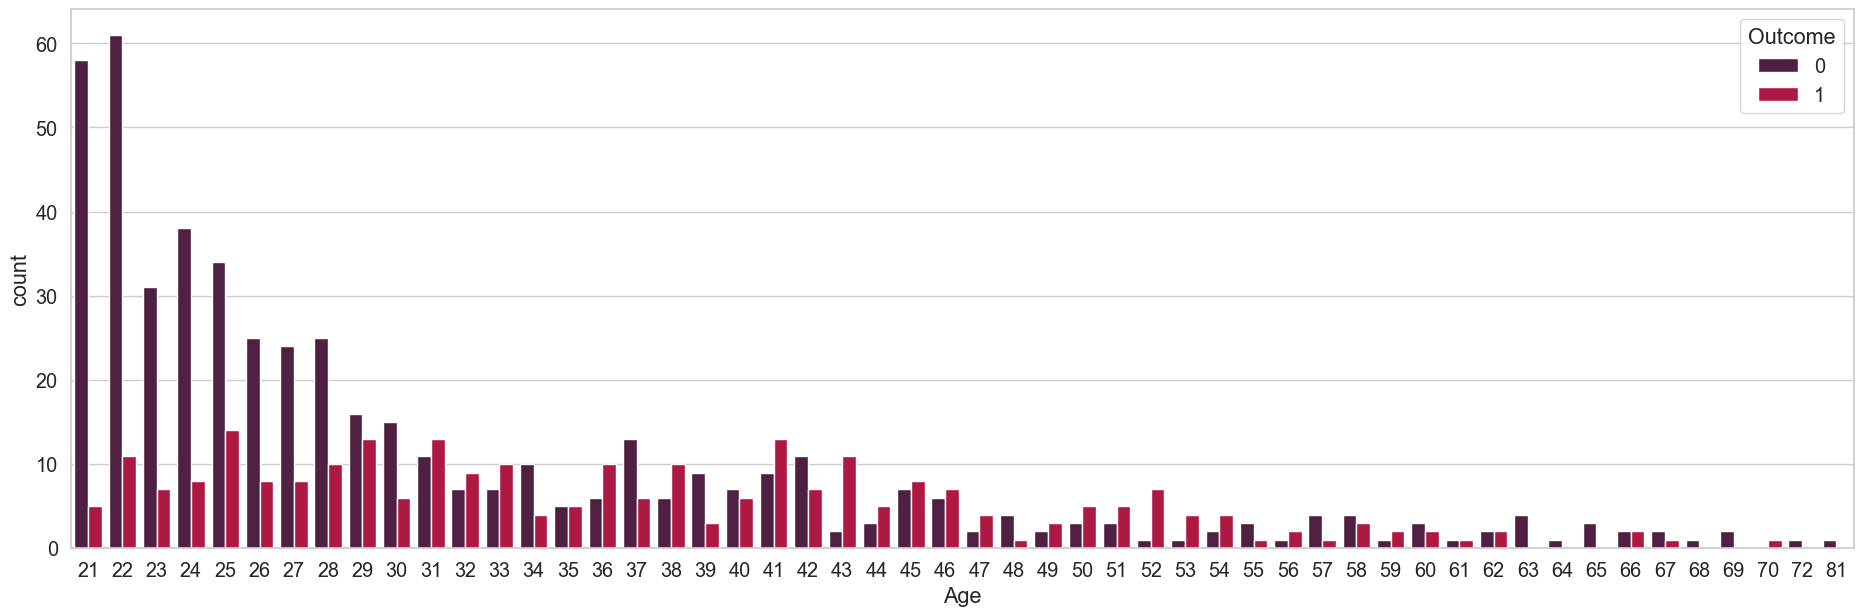

In [9]:
# def num_summary(df, numerical_col, plot=False):
#     quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
#     print(df[numerical_col].describe(quantiles))
# 
#     if plot:
#         plt.figure(figsize=(10, 5))
#         # df[numerical_col].hist(bins=20)
#         sns.histplot(df[numerical_col], kde=True)
#         plt.show()
# 
# 
# for col in num_cols:
#     num_summary(df, col, plot=True)


def num_features_hist(df, column_name, i, hue):
    rcParams['figure.figsize'] = 30, 50
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=column_name, hue=hue, kde=True, palette=constraints)


def num_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Quantiles', 'Distribution'))

    fig.add_trace(go.Box(y=df[column_name],
                         name=str(column_name),
                         showlegend=False,
                         marker_color=constraints[1]),
                  row=1, col=1)

    fig.add_trace(go.Histogram(x=df[column_name],
                               xbins=dict(start=df[column_name].min(),
                                          end=df[column_name].max()),
                               showlegend=False,
                               name=str(column_name),
                               marker=dict(color=constraints[0],
                                           line=dict(color='#DBE6EC',
                                                     width=1))),
                  row=1, col=2)

    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


i = 0
for column_name in num_cols:
    i = i + 1
    num_summary(df, column_name)
    num_features_hist(df, column_name, i, hue='Outcome')

plt.figure(figsize=(23, 7))
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.5)
sns.countplot(x=df['Age'], hue=df['Outcome'], palette=constraints);


# Analysis of Categorical Features

In [10]:
# def cat_summary(df, col_name, plot=False):
#     print(pd.DataFrame({col_name: df[col_name].value_counts(),
#                         "Ratio": 100 * df[col_name].value_counts() / len(df)}))
#     print("##########################################")
#     if plot:
#         sns.countplot(x=df[col_name], data=df)
#         plt.show()
# 
# 
# for col in cat_cols:
#     cat_summary(df, col, plot=True)


def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=df[column_name].value_counts().values.tolist(),
                         x=[str(i) for i in df[column_name].value_counts().index],
                         text=df[column_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=column_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=cat_feat_constraints,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=df[column_name].value_counts().keys(),
                         values=df[column_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=column_name,
                         marker=dict(colors=cat_feat_constraints)),
                  row=1, col=2)

    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


categorical_variable_summary(df, 'Outcome')

In [11]:
# Hedef değişken analizi 

# Kategorik değişkenlerin target değişkene göre analizi
def target_summary_with_cat(df, target, categorical_col):
    print(pd.DataFrame({"Target_Mean": df.groupby(categorical_col)[target].mean(),
                        "Count": df[categorical_col].value_counts(),
                        "Ratio": 100 * df[categorical_col].value_counts() / len(df)}))
    print("#" * 50)


for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col)


         Target_Mean  Count    Ratio
Outcome                             
0            0.00000    500 65.10417
1            1.00000    268 34.89583
##################################################


In [12]:
# Numerik değişkenlerin target değişkenine göre analizi

def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}))
    print("#" * 50)


for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0            3.29800
1            4.86567
##################################################
          Glucose
Outcome          
0       109.98000
1       141.25746
##################################################
         BloodPressure
Outcome               
0             68.18400
1             70.82463
##################################################
         SkinThickness
Outcome               
0             19.66400
1             22.16418
##################################################
          Insulin
Outcome          
0        68.79200
1       100.33582
##################################################
             BMI
Outcome         
0       30.30420
1       35.14254
##################################################
         DiabetesPedigreeFunction
Outcome                          
0                         0.42973
1                         0.55050
##################################################
             Age
Outcome   

In [13]:
def missing_values_table(df, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df)

    if na_name:
        return na_columns


missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


# Feature Engineering

In [14]:
def maybe_missing(df, col_name):
    variables = df[df[col_name] == 0].shape[0]
    return variables


for col in num_cols:
    print(col, maybe_missing(df, col))

na_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]

for col in na_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])  # 0 değerinin anlamlı olmadığı değişkenler için NA ataması

na_columns = missing_values_table(df, True)


Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
               n_miss    ratio
Insulin           374 48.70000
SkinThickness     227 29.56000
BloodPressure      35  4.56000
BMI                11  1.43000
Glucose             5  0.65000


In [15]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [16]:
df["Age_Cat"] = pd.cut(df.Age, 5, labels=[1, 2, 3, 4, 5])
df["OBESE"] = np.where(df.BMI >= 30, 1, 0)

In [17]:
df['Insulin'] = df['Insulin'].fillna(
    df.groupby(["Age_Cat", "Outcome"])['Insulin'].transform('median'))  # Fill Missing Insulin
df['BMI'] = df['BMI'].fillna(df.groupby(["Age_Cat", "Outcome"])['BMI'].transform('median'))  # Fill Missing BMI

In [18]:
bins = [-1, 18.5, 25, 30, 35, 40, float('inf')]
labels = ["Underweight", "Normal Weight", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"]
df['BMI_Cat'] = pd.cut(df['BMI'], bins=bins, labels=labels)

In [19]:
bins = [-1, 1, 3, 10, float('inf')]
labels = ["Childless", "One-Three", "Four-Nine", "Over-Ten"]
df["Pregnancy_Cat"] = pd.cut(df["Pregnancies"], bins=bins, labels=labels)

df["Is_Have_Child"] = np.where(df.Pregnancies > 0, 1, 0)

In [20]:
df["Glucose"] = df.Glucose.fillna(df.Glucose.median())


In [21]:
df["hypoglycaemia"] = np.where(df.Glucose < 70, 1, 0)
df["Glucose_Cat"] = np.where(df.Glucose < 140, 0, 1)  # 0 => No Risk , 1 => 1 At Risk

In [22]:
# df['Glucose_BMI'] = df['Glucose'] * df['BMI']
# df['Age_DiabetesPedigreeFunction'] = df['Age'] * df['DiabetesPedigreeFunction']
# df['Pregnancies_Per_Age'] = df['Pregnancies'] / df['Age']
# df['Glucose_Minus_Insulin'] = df['Glucose'] - df['Insulin']
# df['GIR'] = df['Glucose'] / df['Insulin']
# df['BMI_DiabetesPedigree'] = df['BMI'] * df['DiabetesPedigreeFunction']
# df['Age_Insulin'] = df['Age'] * df['Insulin']
# df['Glucose_BMI_Difference'] = df['Glucose'] - df['BMI']
# df["glucose_per_bmi"] = df["Glucose"] / df["BMI"]
# df["insulin_per_age"] = df["Insulin"] / df["Age"]

In [23]:
def insulin_level(dataframe):
    if dataframe["Insulin"] <= 100:
        return "Normal"
    if dataframe["Insulin"] > 100 and dataframe["Insulin"] <= 126:
        return "Prediabetes"
    elif dataframe["Insulin"] > 126:
        return "Diabetes"


df["Insulin_Level"] = df.apply(insulin_level, axis=1)

In [24]:
def glucose_level(glucose):
    if 16 <= glucose <= 140:
        return "Normal"
    elif 140 < glucose <= 200:
        return "Prediabetes"
    else:
        return "Diabetes"


df["Glucose_Level"] = df["Glucose"].apply(glucose_level)
############################################################

# def glucose_level(dataframe, col_name="Glucose"):
#     if 16 <= dataframe[col_name] <= 140:
#         return "Normal"
#     elif 140 < dataframe[col_name] <= 200:
#         return "Prediabetes"
#     else:
#         return "Diabetes"
# 
# 
# df["Glucose_Level"] = df.apply(glucose_level, axis=1)
# df["Glucose_Level"] = df.apply(glucose_level, axis=1)

In [25]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768 	 Variables: 16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_cols size: 10
cat_cols: ['Insulin_Level', 'Glucose_Level', 'Outcome', 'Age_Cat', 'OBESE', 'BMI_Cat', 'Pregnancy_Cat', 'Is_Have_Child', 'hypoglycaemia', 'Glucose_Cat']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_cols size: 6
num_cols: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_but_car size: 0
cat_but_car: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_but_cat size: 8
num_but_cat: ['Outcome', 'Age_Cat', 'OBESE', 'BMI_Cat', 'Pregnancy_Cat', 'Is_Have_Child', 'hypoglycaemia', 'Glucose_Cat']


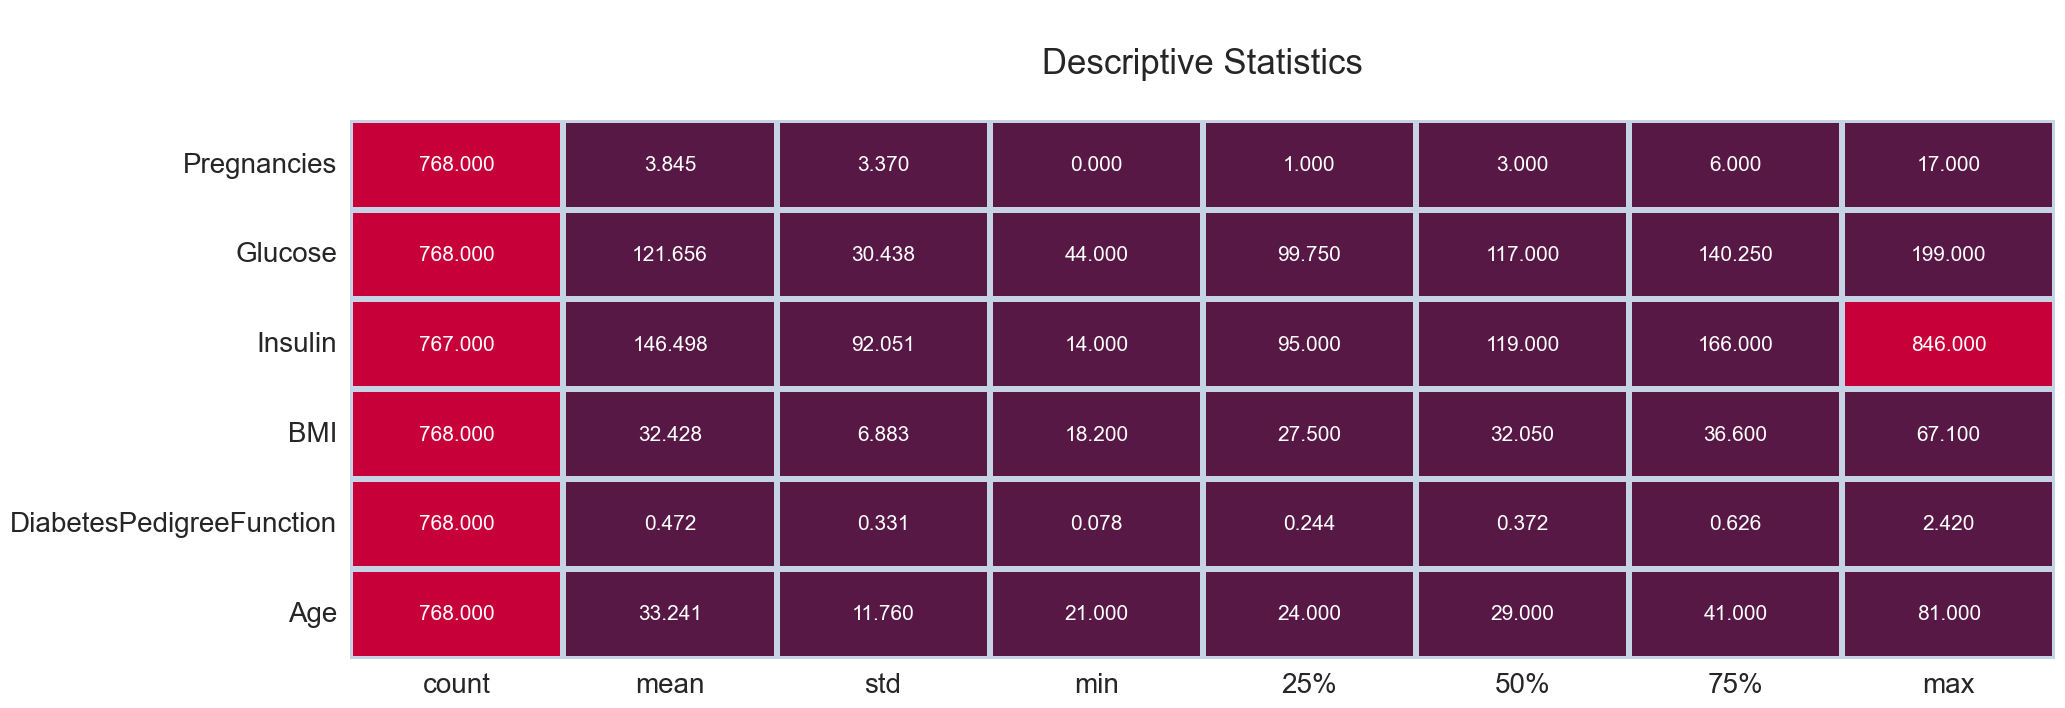

In [26]:
descriptive_statistics(df[num_cols])


# Outliers

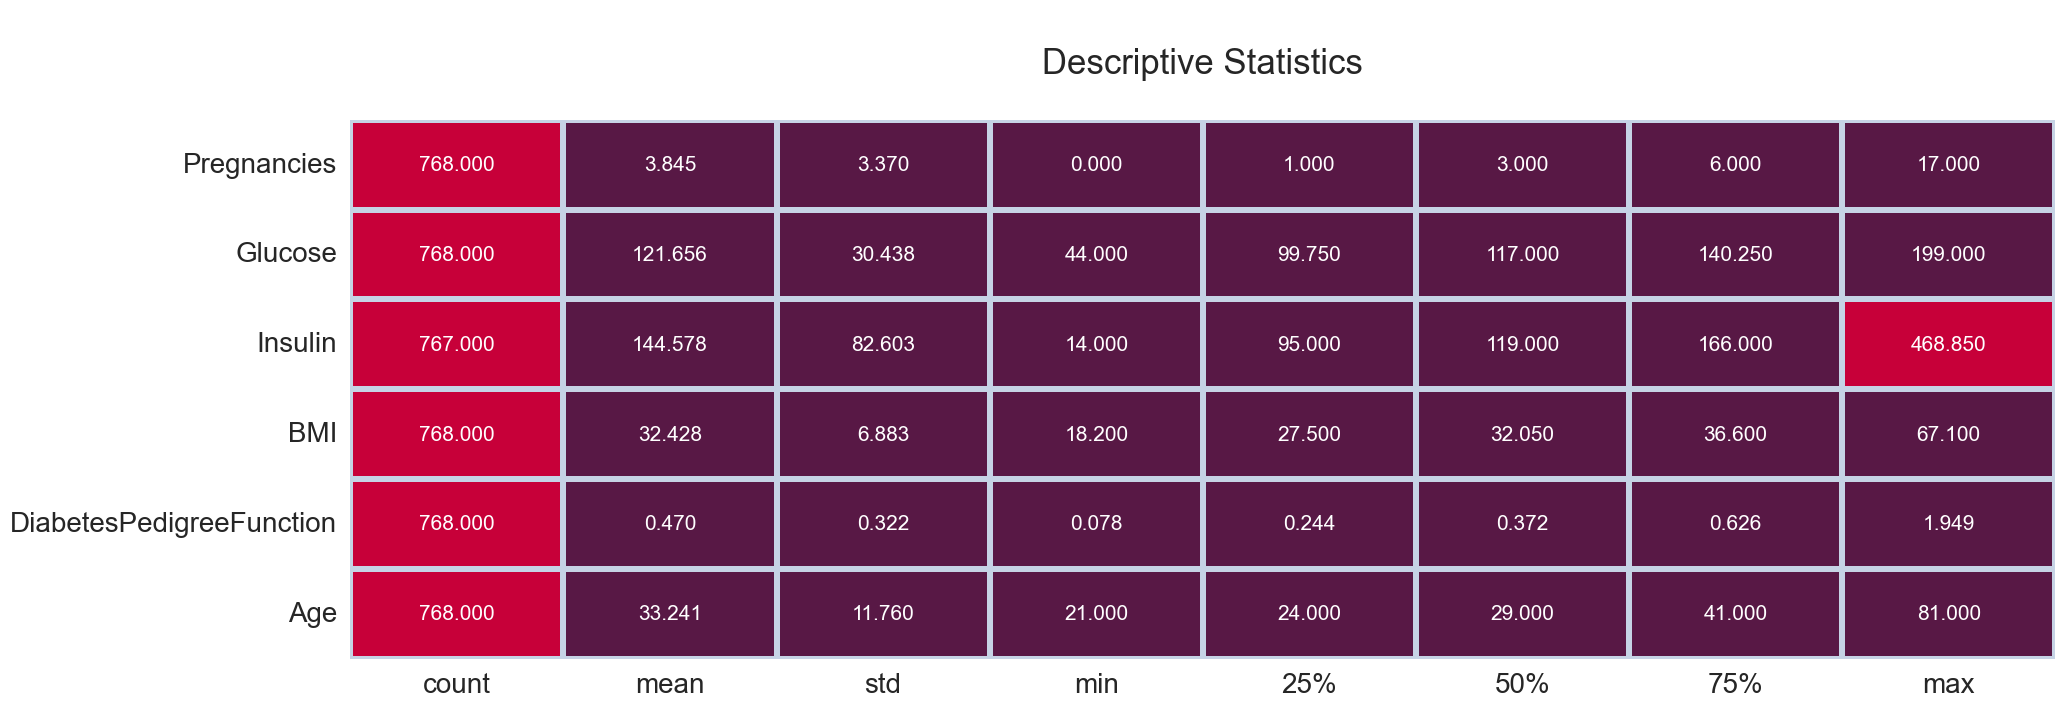

In [27]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)

descriptive_statistics(df[num_cols])

# Categorical Features Summary

In [28]:
def summary_cat_features(dataframe, column_name, label):
    data = go.Bar(x=dataframe.groupby(column_name).agg({label: 'mean'}).reset_index()[column_name],
                  y=dataframe.groupby(column_name).agg({label: 'mean'}).reset_index()[label],
                  text=round(dataframe.groupby(column_name).agg({label: 'mean'}).reset_index()[label], 3),
                  textposition='auto',
                  marker=dict(color=cat_feat_constraints, line_color='white', line_width=1.5))

    layt = go.Layout(title={'text': f'Average {label} by {column_name} Categories', 'y': 0.9, 'x': 0.2,
                            'xanchor': 'center', 'yanchor': 'top'},
                     xaxis=dict(title=column_name),
                     yaxis=dict(title=label),
                     template='plotly_white')

    fig = go.Figure(data=data, layout=layt)
    iplot(fig)


for i in [col for col in cat_cols if col != "Outcome"]:
    categorical_variable_summary(df, i)
    summary_cat_features(df, i, 'Outcome')

In [29]:
from IPython.display import display #I assume you are in a notebook

for i in [col for col in cat_cols if col != "Outcome"]:
    my = pd.crosstab(df.Outcome, df[i], margins=True).style.background_gradient(cmap='summer_r')
    display(my)




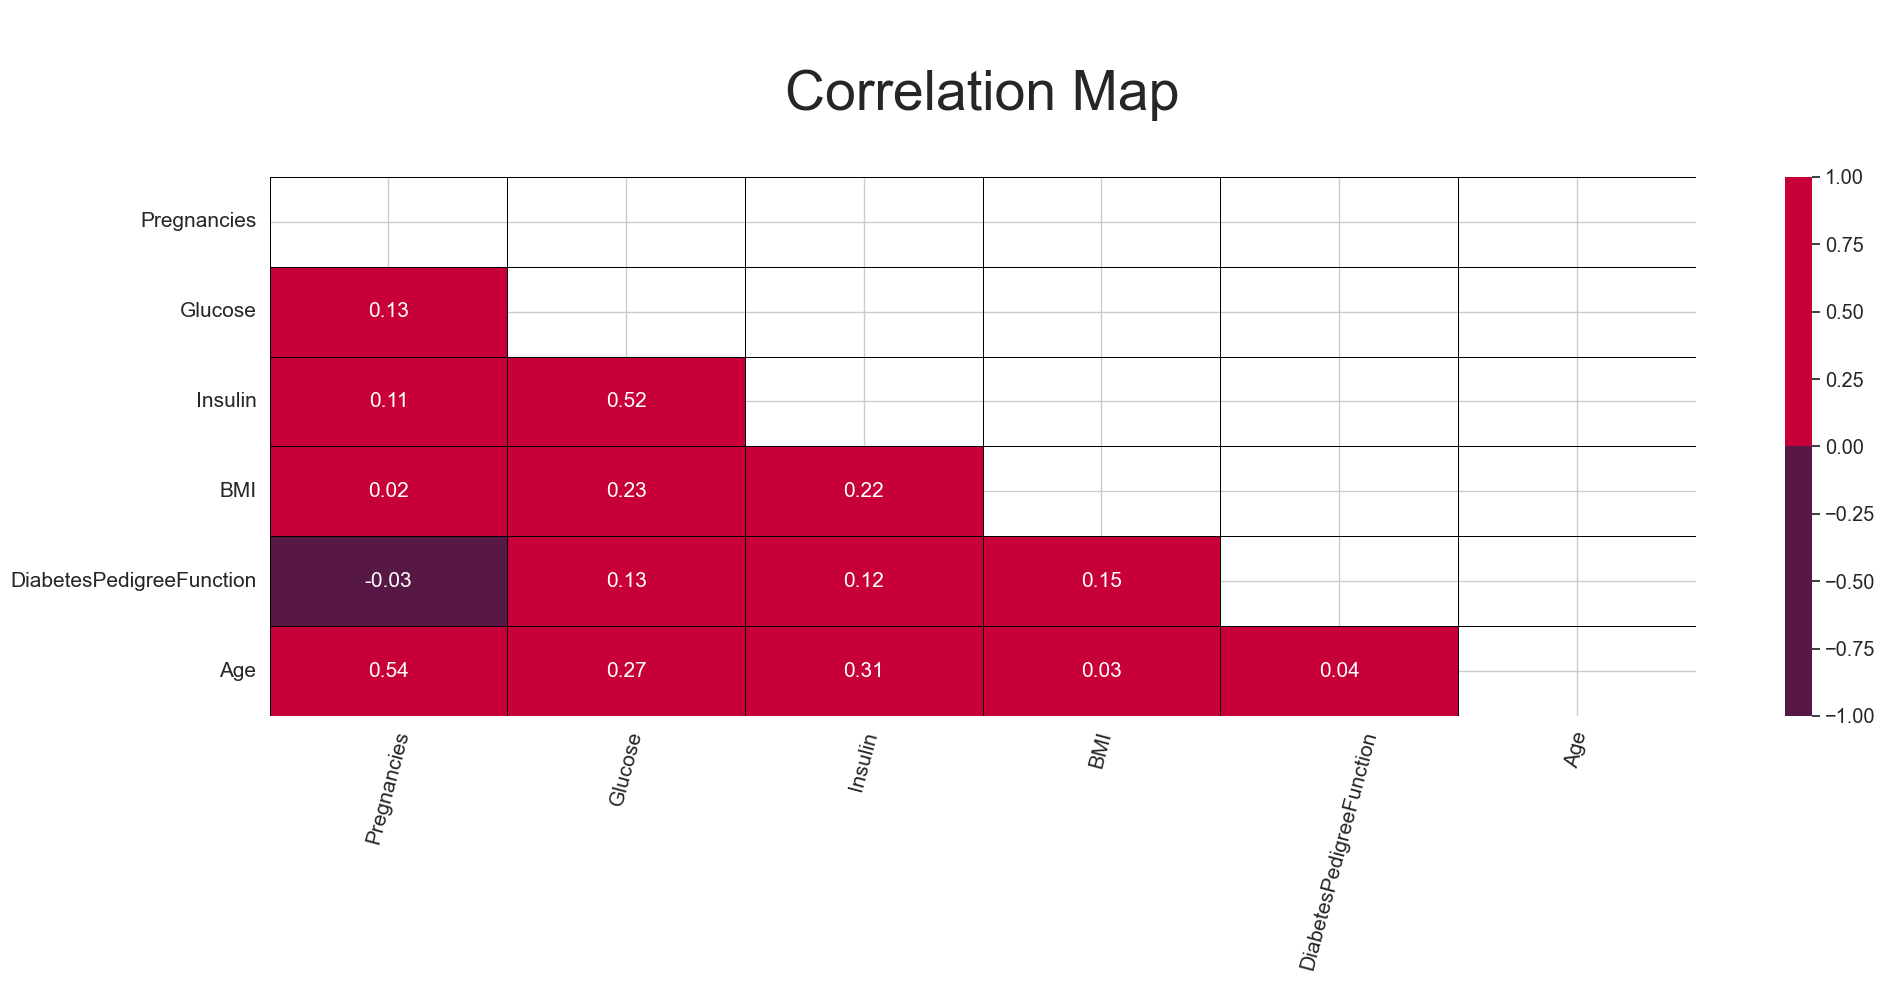

In [30]:
corr_map(df[num_cols])

# Data Preparation

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    float64 
 1   Glucose                   768 non-null    float64 
 2   Insulin                   767 non-null    float64 
 3   BMI                       768 non-null    float64 
 4   DiabetesPedigreeFunction  768 non-null    float64 
 5   Age                       768 non-null    float64 
 6   Outcome                   768 non-null    int64   
 7   Age_Cat                   768 non-null    category
 8   OBESE                     768 non-null    int32   
 9   BMI_Cat                   768 non-null    category
 10  Pregnancy_Cat             768 non-null    category
 11  Is_Have_Child             768 non-null    int32   
 12  hypoglycaemia             768 non-null    int32   
 13  Glucose_Cat               768 non-null    int32   

In [32]:
df.Age_Cat = df.Age_Cat.astype('object')

# Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)

In [33]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


def one_hot_encoder(df, categorical_cols, drop_first=True):
    df = pd.get_dummies(df, columns=categorical_cols,
                        drop_first=drop_first, dtype=int)
    return df


df = one_hot_encoder(df, ohe_cols)


In [34]:
binary_col = [col for col in df.columns if
              df[col].dtypes in ['object', 'category'] and df[col].nunique() == 2]


def label_encoder(df, binary_col):
    le = LabelEncoder()
    df[binary_col] = le.fit_transform(df[binary_col])
    return df


for col in binary_col:
    label_encoder(df, col)


# Missing Values

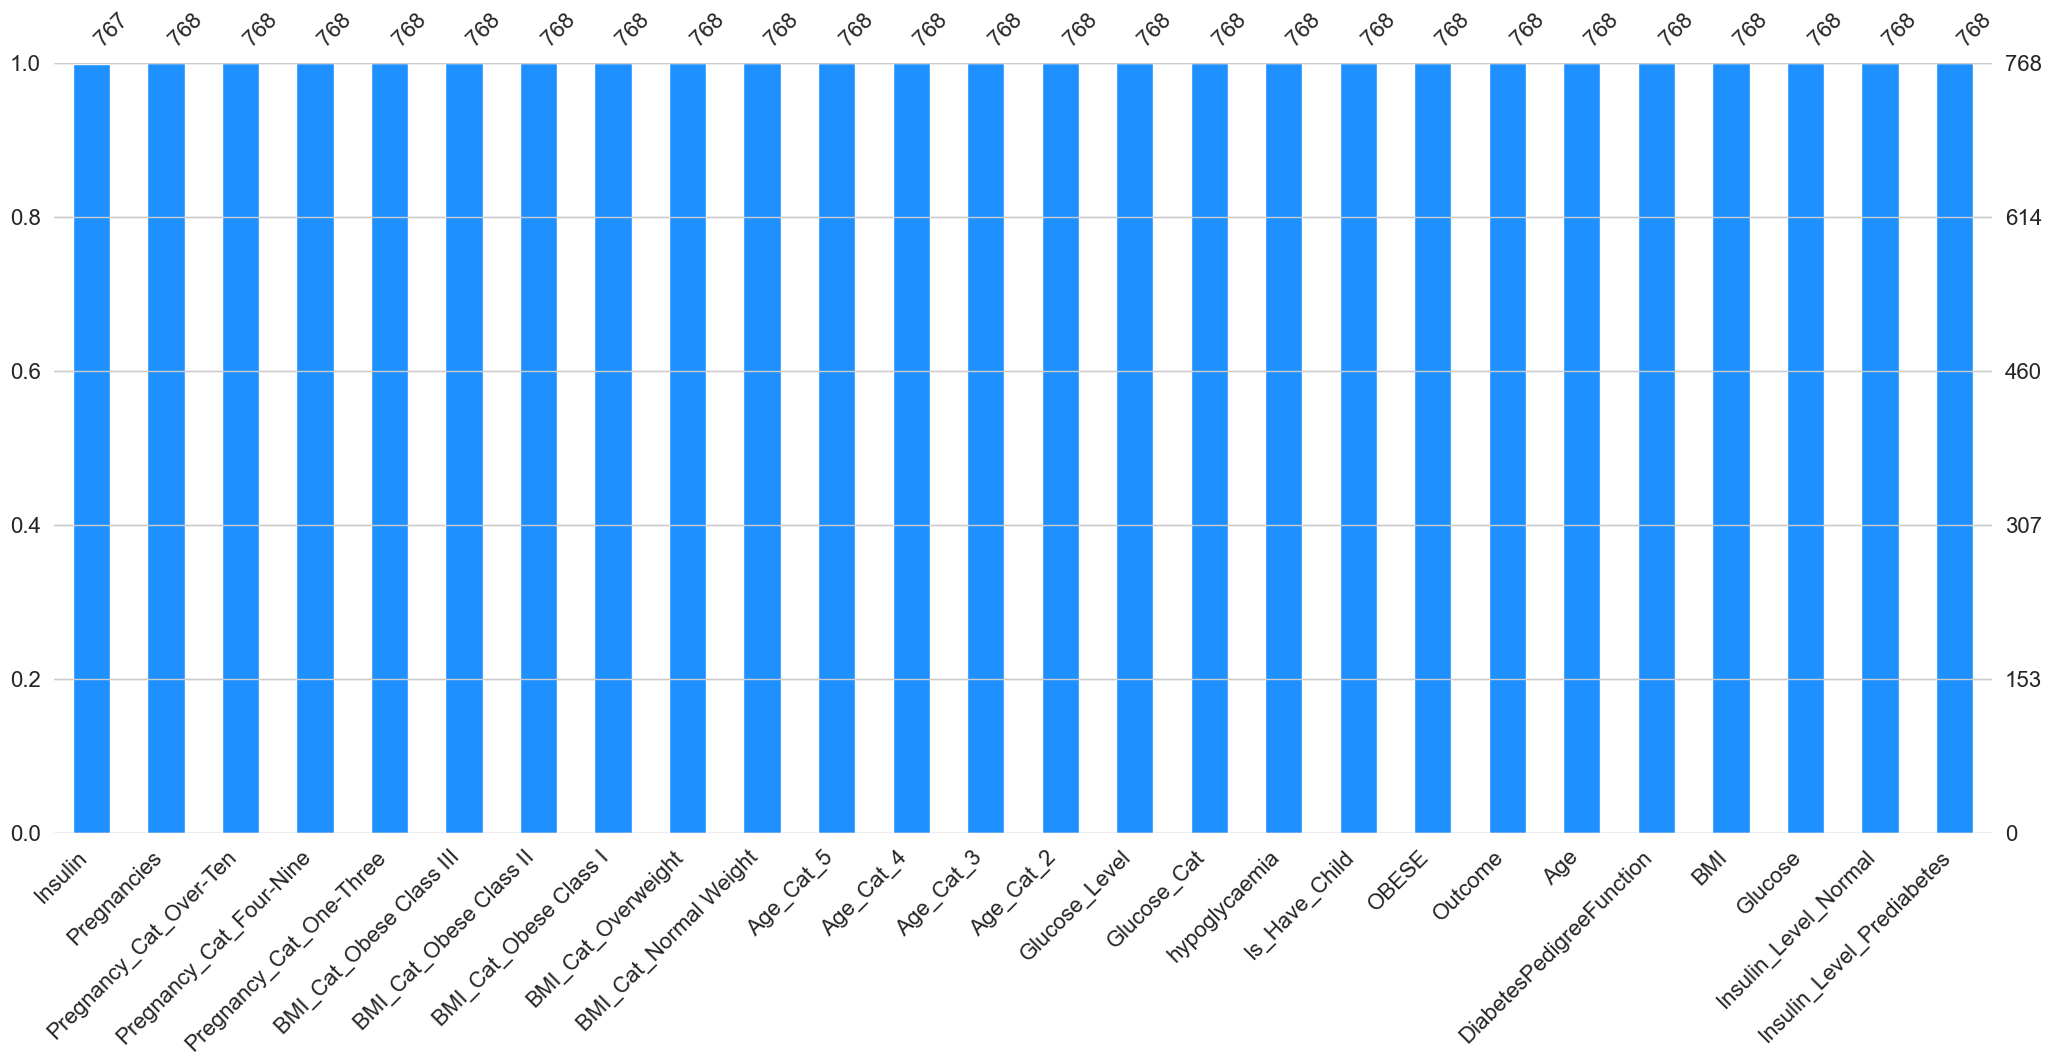

In [35]:
msno.bar(df ,color="dodgerblue", sort="ascending");

In [36]:
def missing_values_table(df, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0]
             * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)],
                           axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)

    if na_name:
        return na_columns


missing_values_table(df)


         n_miss   ratio
Insulin       1 0.13000


In [37]:
print("Infinity values:", np.any(np.isinf(df)))

if np.any(np.isinf(df)):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)


Infinity values: False


In [38]:
# Eksik gözlemler KNN Algoritması ile dolduruldu.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns = df.columns)

# Standardization

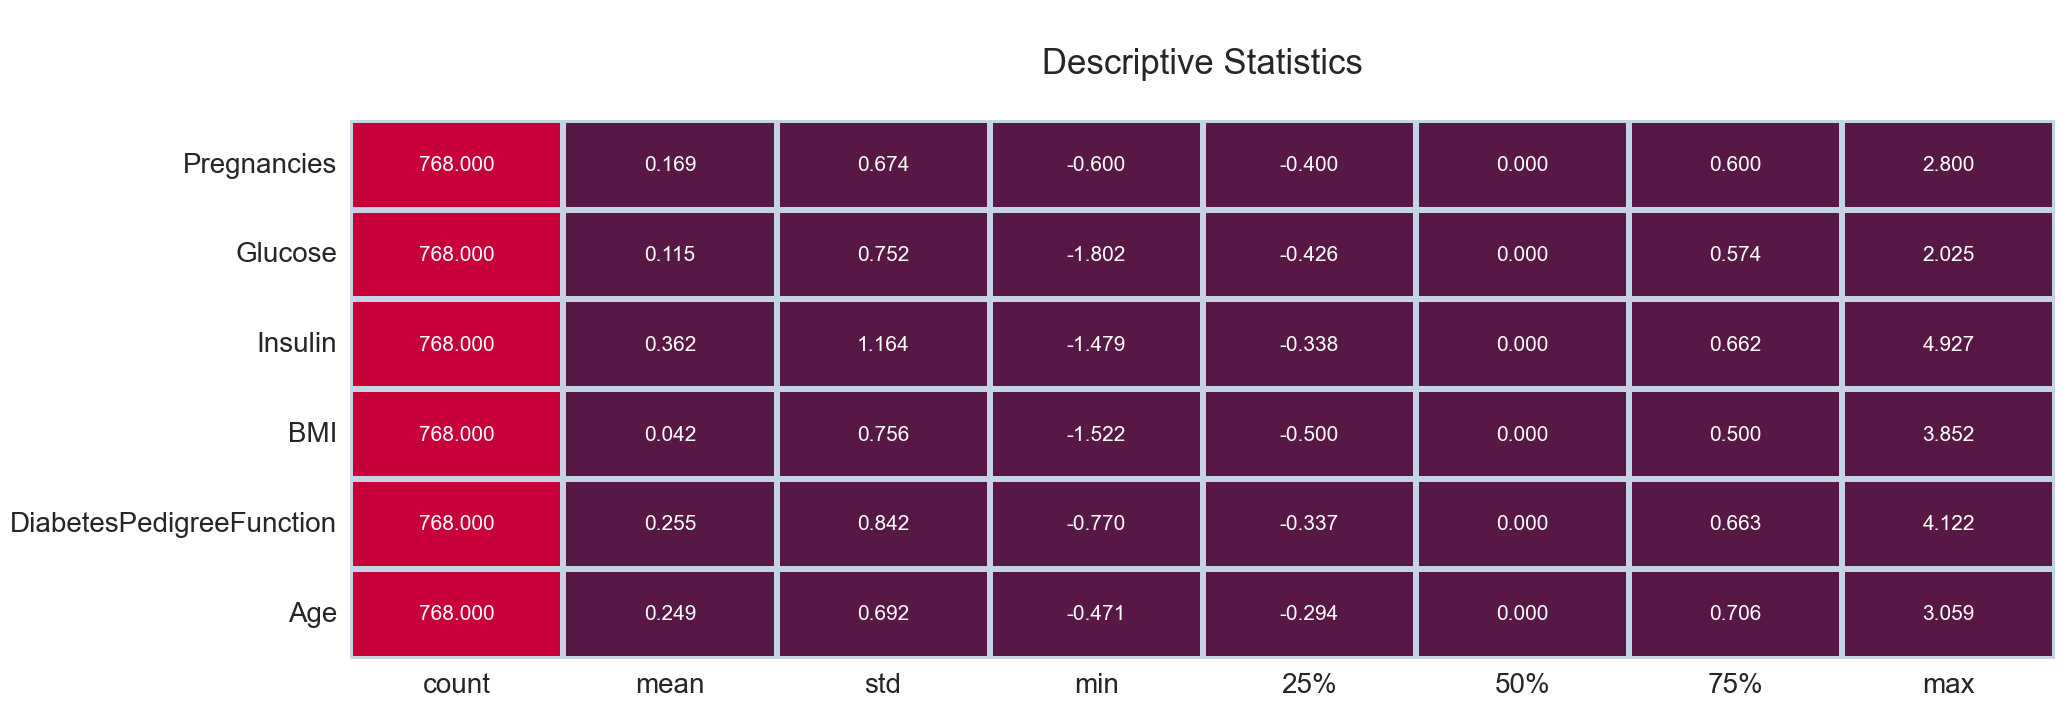

In [39]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

descriptive_statistics(df[num_cols])

# Train - Test Split

In [45]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)
random_state = 135

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=random_state,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    shuffle=True)

print(f"The shape of X_train: {colored(X_train.shape,'red')}")
print(f"The shape of X_test: {colored(X_test.shape,'red')}")
print(f"The shape of y_train: {colored(y_train.shape,'red')}")
print(f"The shape of y_test: {colored(y_test.shape,'red')}")

The shape of X_train: (614, 25)
The shape of X_test: (154, 25)
The shape of y_train: (614,)
The shape of y_test: (154,)


In [97]:
metric_res = []
models = []
models.append(("LightGBM", LGBMClassifier(random_state=random_state)))
models.append(('XGB', XGBClassifier(random_state=random_state)))
models.append(('CatBoost', CatBoostClassifier(
    random_state=random_state, verbose=False)))
models.append(
    ('Gradient', GradientBoostingClassifier(random_state=random_state)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=random_state)))
models.append(('RF', RandomForestClassifier(random_state=random_state)))
models.append(('CART', DecisionTreeClassifier(random_state=random_state)))
models.append(('LR', LogisticRegression(random_state=random_state)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Mlp', MLPClassifier(random_state=random_state)))


In [98]:
def clc_ml(model):

    y_pred = model.fit(X_train, y_train).predict(X_test)
    Accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, y_pred)

    kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    cv_mean = cv_results.mean()

    mt_dataframe = pd.DataFrame({'Scores': [Accuracy, roc_auc, f1, cv_mean],
                                 'Metrics': ['Accuracy',
                                             'ROC-AUC',
                                             'F1-Score',
                                             'Cross-Validation Mean']})
    model_results = pd.DataFrame({
        'Model': [name],
        'Accuracy': [Accuracy],
        'ROC-AUC': [roc_auc],
        'F1-Score': [f1],
        'Cross-Validation Mean': [cv_mean]
    })
    metric_res.append(model_results)

    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Bar(x=[round(i, 5) for i in mt_dataframe['Scores']],
                         y=mt_dataframe['Metrics'],
                         text=[round(i, 5) for i in mt_dataframe['Scores']],
                         orientation='h',
                         textposition='inside',
                         name='Scores',
                         marker=dict(color=metric_constraints,
                                     line_color='white',
                                     line_width=1.5)),
                  row=1, col=1)
    fig.update_layout(title={'text': model.__class__.__name__,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    fig.update_xaxes(range=[0, 1], row=1, col=1)

    iplot(fig)


for name, model in models:
    clc_ml(model)


In [99]:
final_results = pd.concat(metric_res, ignore_index=True)
final_results.sort_values(by='Accuracy', ascending=False)

Model  Accuracy  ROC-AUC  F1-Score  Cross-Validation Mean
3  Gradient   0.88961  0.94648   0.83168                0.87633
2  CatBoost   0.88312  0.93519   0.82000                0.88674
0  LightGBM   0.87662  0.94315   0.81188                0.87765
6      CART   0.86364  0.84815   0.80374                0.83194
5        RF   0.85065  0.90833   0.78095                0.87367
9       Mlp   0.85065  0.89278   0.78505                0.85415
1       XGB   0.84416  0.93074   0.76000                0.88030
8       KNN   0.84416  0.86926   0.77778                0.83197
4  AdaBoost   0.83766  0.88269   0.76190                0.85285
7        LR   0.83117  0.89296   0.75000                0.83727

# Model Tuning

In [100]:
lgbm = LGBMClassifier(random_state=random_state)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
               "n_estimators": [500, 1000, 1500],
               "max_depth": [3, 5, 8]}


lgbm_grid_cv = GridSearchCV(lgbm,
                            lgbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [101]:
lgbm_final = LGBMClassifier(**lgbm_grid_cv.best_params_, random_state=random_state).fit(X_train, y_train)

In [102]:
cross_val_score(lgbm_final, X, y, cv = 10).mean()

0.8919685577580314

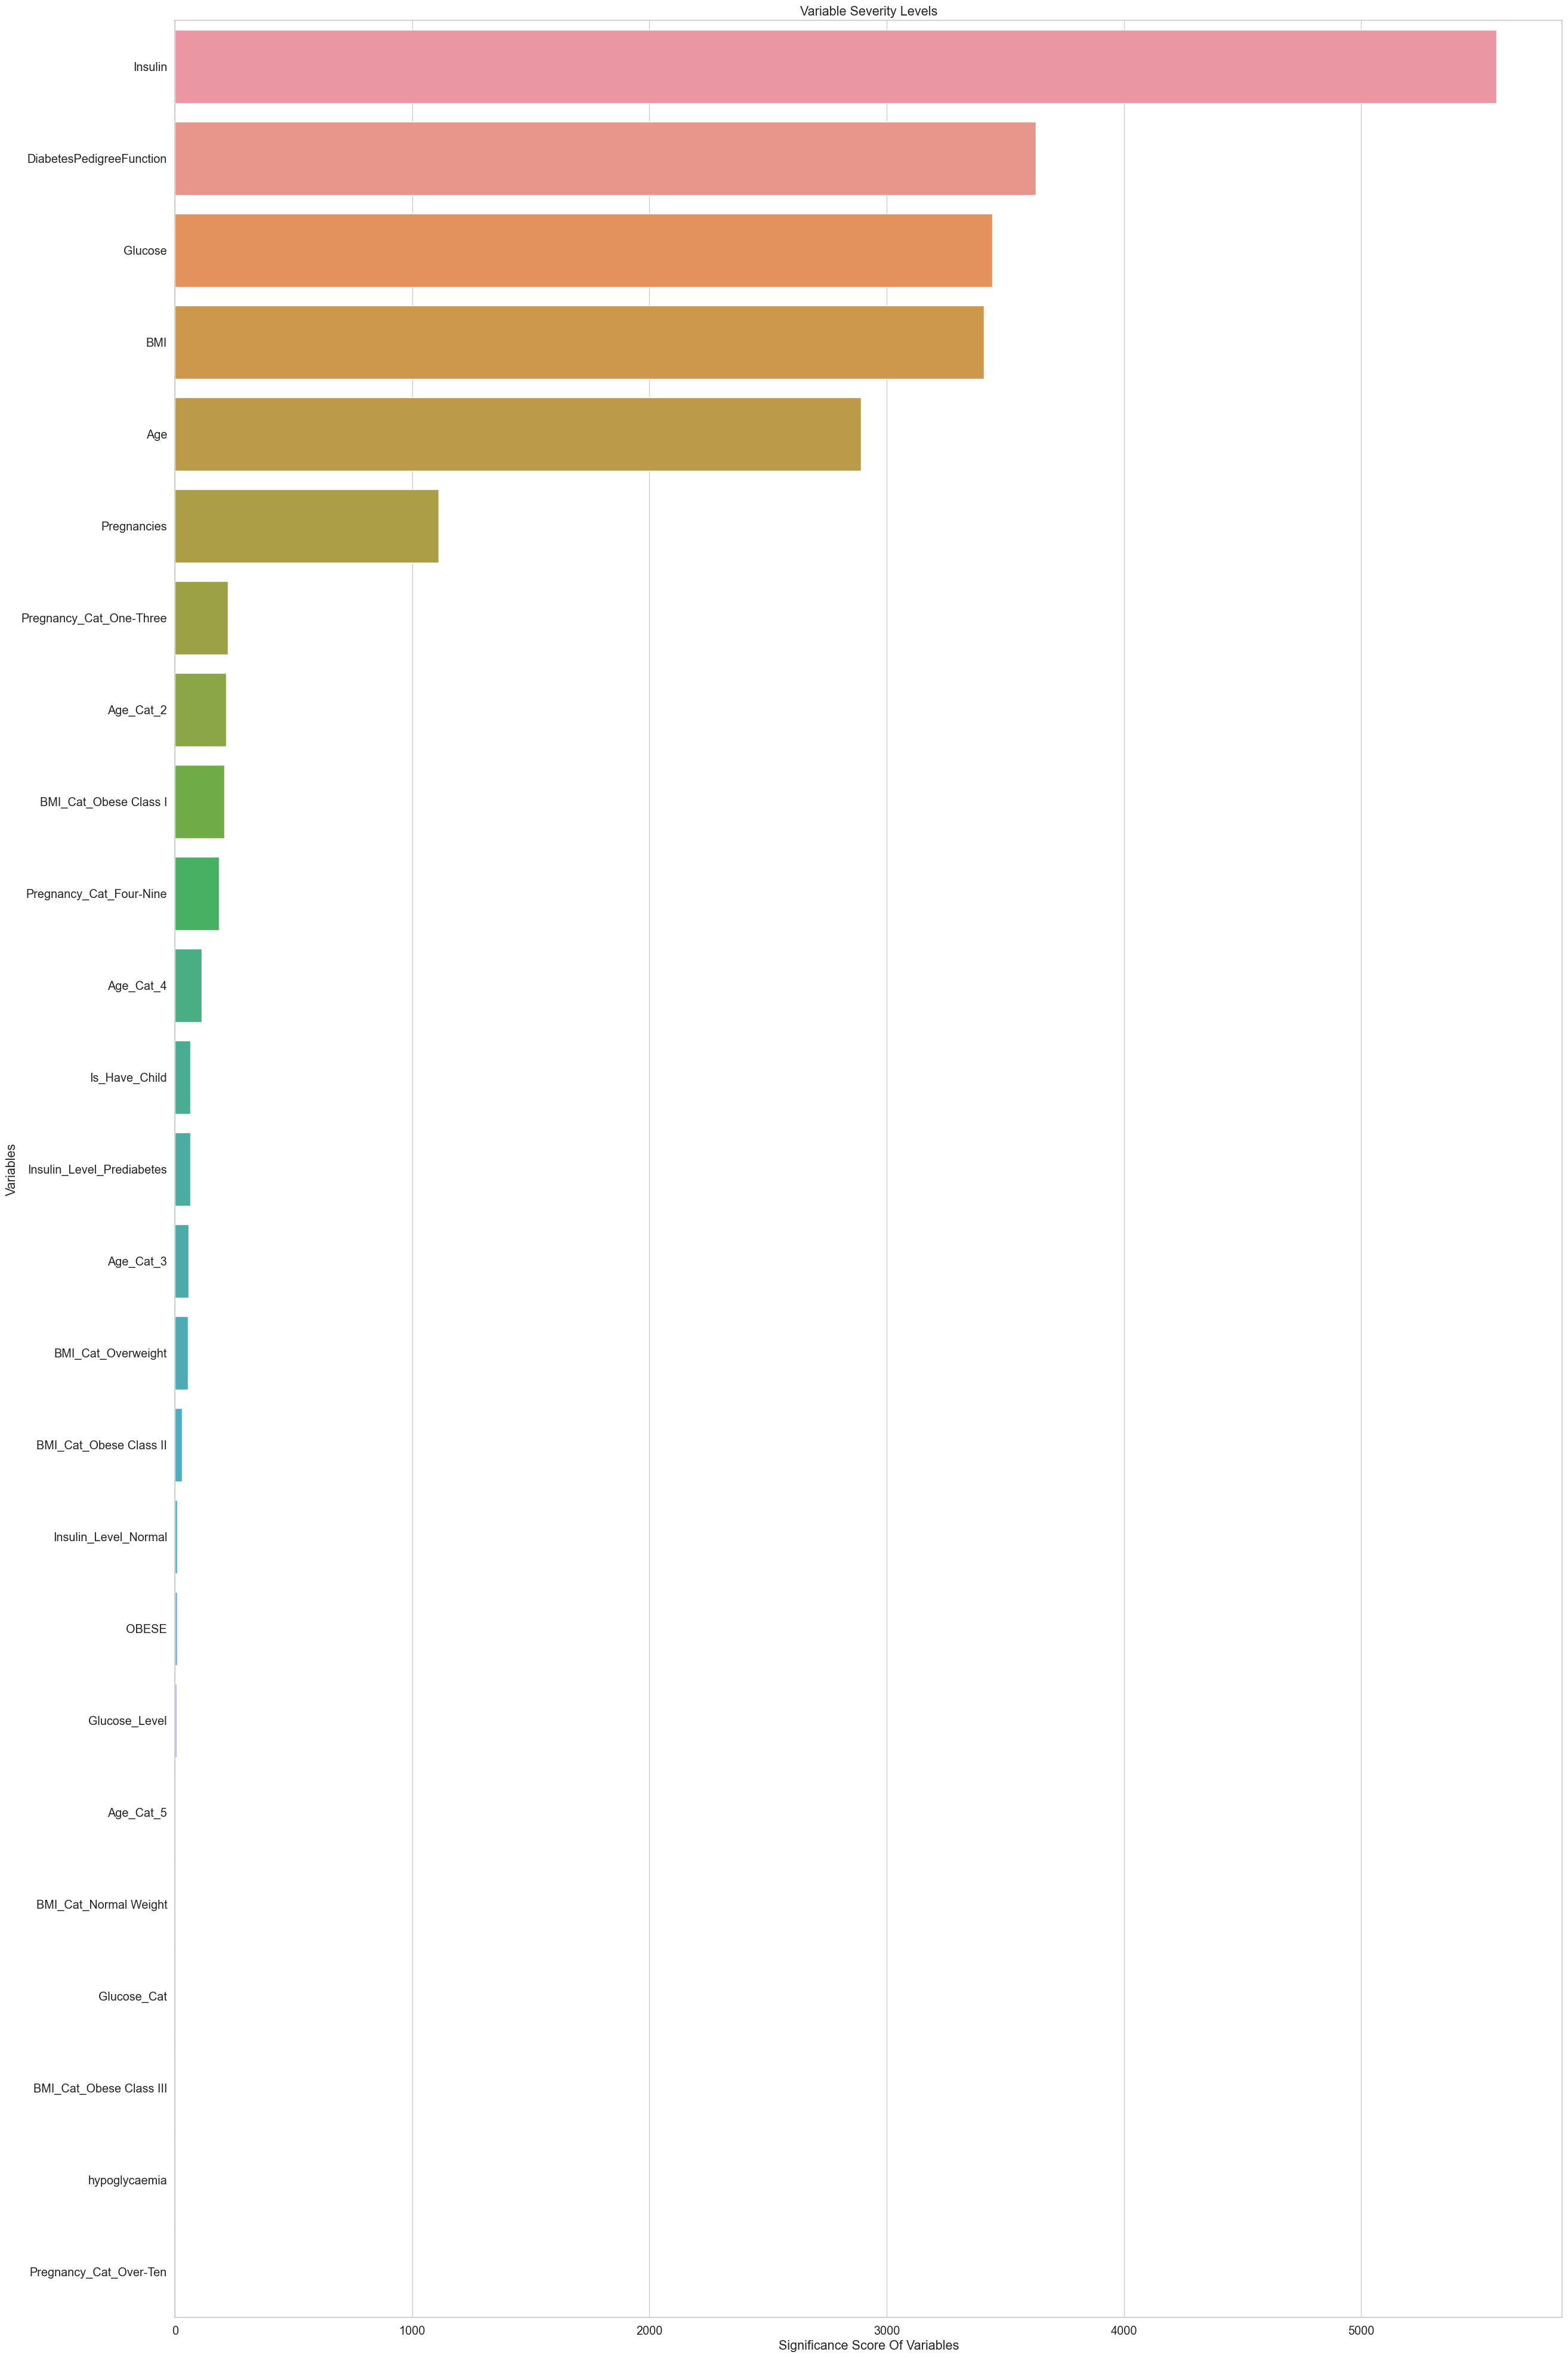

In [106]:
feature_imp = pd.Series(lgbm_final.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()